In [1]:
import os
import sys
import numpy as np
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt


In [2]:
dir_results = './results'

In [3]:
### Load data
spindles_bl = pd.read_csv(os.path.join(dir_results, 'spindles_bl.csv'), index_col=0)
spindles_f = pd.read_csv(os.path.join(dir_results, 'spindles_f.csv'), index_col=0)
spindles_mspindle = pd.read_csv(os.path.join(dir_results, 'spindles_mspindle.csv'), index_col=0)
spindles_ch_f = pd.read_csv(os.path.join(dir_results, 'spindles_ch_f.csv'), index_col=0)
spindles_ch_f_spindle = pd.read_csv(os.path.join(dir_results, 'spindles_ch_f_spindle.csv'), index_col=0)
so_ch = pd.read_csv(os.path.join(dir_results, 'so_ch.csv'), index_col=0)
so_ch_e = pd.read_csv(os.path.join(dir_results, 'so_ch_e.csv'), index_col=0)
so_ch_n = pd.read_csv(os.path.join(dir_results, 'so_ch_n.csv'), index_col=0)

# for all of these dfs, try every column to set to float:
for df in [spindles_ch_f, spindles_ch_f_spindle, spindles_mspindle, spindles_bl, spindles_f,
            so_ch, so_ch_e, so_ch_n]:
    for col in df.columns:
        col_new = col.strip().lower()
        df.rename(columns={col: col_new}, inplace=True)
        try:
            df[col_new] = df[col_new].astype(float)
        except ValueError:
            pass


In [4]:
n_head = 3
print("\nspindles_bl: ", spindles_bl.shape, "M-Spindle summary per subject")
print(spindles_bl.head(n_head))
print("\nspindles_f: ", spindles_f.shape, "M-Spindle density per subject stratified by frequency")
print(spindles_f.head(n_head))
print("\nspindles_mspindle: ", spindles_mspindle.shape, "M-Spindle list for all subjects")
print(spindles_mspindle.head(n_head))
print("\nspindles_ch_f: ", spindles_ch_f.shape, 'Spindle summary statistics per channel stratified by frequency')
print(spindles_ch_f.head(n_head))
print("\nspindles_ch_f_spindle: ", spindles_ch_f_spindle.shape, 'Per-Spindle list')
print(spindles_ch_f_spindle.head(n_head))
print("\nso_ch: ", so_ch.shape, "SO summary statistics per channel")
print(so_ch.head(n_head))
print("\nso_ch_e: ", so_ch_e.shape, "SO summary per epoch per channel")
print(so_ch_e.head(n_head))
print("\nso_ch_n: ", so_ch_n.shape, "SO list per epoch per channel")
print(so_ch_n.head(n_head))



spindles_bl:  (2, 3) M-Spindle summary per subject
           msp_dens  msp_mins  msp_n
ID                                  
study_001  3.338156     276.5  923.0
study_002  3.434185     254.5  874.0

spindles_f:  (34, 2) M-Spindle density per subject stratified by frequency
             f  msp_fdens
ID                       
study_001  8.0   0.000000
study_002  8.0   0.000000
study_001  8.5   0.057866

spindles_mspindle:  (1797, 9) M-Spindle list for all subjects
           mspindle  msp_dur     msp_f    msp_fl  msp_fu  msp_size  msp_start  \
ID                                                                              
study_001       1.0    0.440  15.62500  15.62500  15.625       1.0   6234.505   
study_002       1.0    1.665  13.72978  11.71875  15.625       5.0   1920.890   
study_001      10.0    0.695   9.37500   9.37500   9.375       1.0   7103.950   

           msp_stat  msp_stop  
ID                             
study_001  1.220390  6234.945  
study_002  1.489506  1922.555

In [5]:
spindles_mspindle

,mspindle,msp_dur,msp_f,msp_fl,msp_fu,msp_size,msp_start,msp_stat,msp_stop
ID,,,,,,,,,
study_001,1.0,0.440,15.625000,15.625000,15.62500,1.0,6234.505,1.220390,6234.945
study_002,1.0,1.665,13.729780,11.718750,15.62500,5.0,1920.890,1.489506,1922.555
study_001,10.0,0.695,9.375000,9.375000,9.37500,1.0,7103.950,1.788308,7104.645
study_002,10.0,0.840,14.062500,14.062500,14.06250,3.0,1941.015,1.577858,1941.855
study_001,100.0,0.950,10.781143,9.375000,12.50000,4.0,8024.120,1.709627,8025.070
...,...,...,...,...,...,...,...,...,...
study_002,97.0,0.605,13.797559,12.500000,14.06250,4.0,4711.230,3.058858,4711.835
study_001,98.0,0.700,10.612943,10.156250,10.93750,2.0,7996.255,1.262149,7996.955
study_002,98.0,0.525,10.937500,10.937500,10.93750,2.0,4712.190,1.655211,4712.715


In [6]:
spindles_ch_f_spindle

,ch,f,spindle,amp,chirp,dur,fft,frq,frq1,frq2,...,peak_sp,q,start,start_sp,stop,stop_sp,symm,symm2,trough,trough_sp
ID,,,,,,,,,,,,,,,,,,,,,
study_001,C4M1,10.0,1.0,27.368647,0.049261,0.790,8.59375,8.227848,8.571429,8.620690,...,7744.0,-0.257608,6248.325,7665.0,6249.115,7822.0,0.449367,0.101266,6248.712452,7742.0
study_002,C4M1,10.0,1.0,28.420981,-1.293996,1.505,10.15625,9.966777,10.714286,9.420290,...,3960.0,-0.370900,1939.510,3902.0,1941.015,4202.0,0.191030,0.617940,1939.821033,3964.0
study_001,C4M1,10.0,2.0,24.790798,-0.120724,0.870,8.59375,8.045977,8.571429,8.450704,...,8706.0,-0.588735,6253.270,8654.0,6254.140,8827.0,0.301724,0.396552,6253.506358,8701.0
study_002,C4M1,10.0,2.0,33.883082,0.516693,0.815,10.15625,10.429448,10.294118,10.810811,...,4926.0,0.062644,1944.140,4828.0,1944.955,4990.0,0.613497,0.226994,1944.617932,4923.0
study_001,C4M1,10.0,3.0,31.803204,0.395257,0.615,7.81250,8.130081,8.695652,9.090909,...,13597.0,-0.063009,6277.515,13503.0,6278.130,13625.0,0.784553,0.569106,6278.029180,13605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
study_002,C4M1,16.0,231.0,35.272339,-0.426743,0.495,15.62500,15.151515,16.216216,15.789474,...,2797987.0,0.903999,22449.745,2797949.0,22450.240,2798047.0,0.333333,0.333333,22449.926837,2797985.0
study_002,C4M1,16.0,232.0,45.411608,0.744417,0.650,15.62500,15.384615,15.384615,16.129032,...,2812228.0,0.113728,22520.855,2812171.0,22521.505,2812300.0,0.423077,0.153846,22521.117016,2812223.0
study_002,C4M1,16.0,233.0,53.175689,0.000000,0.395,17.18750,15.189873,16.666667,16.666667,...,2820184.0,-0.033271,22560.735,2820147.0,22561.130,2820225.0,0.493671,0.012658,22560.917308,2820183.0


In [7]:
so_ch_n

,ch,n,down_amp,down_idx,dur,dur1,dur2,dur_chk,p2p_amp,slope,start,start_idx,stop,stop_idx,trans,trans_freq,up_amp,up_idx
ID,,,,,,,,,,,,,,,,,,
study_001,C4M1,1.0,-53.736213,6985.0,0.935,0.255,0.680,0.935,87.639178,467.271410,6244.785,6957.0,6245.720,7144.0,0.215,2.325581,33.902965,7028.0
study_002,C4M1,1.0,-60.661631,17983.0,1.625,1.015,0.610,1.625,124.677269,367.646248,4499.065,17813.0,4500.690,18138.0,0.345,1.449275,64.015638,18052.0
study_001,C4M1,2.0,-55.092563,8314.0,1.975,0.880,1.095,1.975,81.799478,95.813152,6251.265,8253.0,6253.240,8648.0,1.115,0.448430,26.706915,8537.0
study_002,C4M1,2.0,-85.774766,18241.0,2.060,1.200,0.860,2.060,646.800025,125.218637,4500.690,18138.0,4502.750,18550.0,1.040,0.480769,561.025259,18449.0
study_001,C4M1,3.0,-44.259836,22895.0,0.960,0.315,0.645,0.960,75.978581,268.241430,7044.325,22865.0,7045.285,23057.0,0.695,0.719424,31.718745,23034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
study_001,C4M1,1076.0,-36.433442,3247171.0,1.630,0.950,0.680,1.630,249.604063,130.119434,28445.185,3247037.0,28446.815,3247363.0,0.735,0.680272,213.170622,3247318.0
study_001,C4M1,1077.0,-242.200759,3247404.0,0.645,0.365,0.280,0.645,428.027548,1513.754735,28446.815,3247363.0,28447.460,3247492.0,0.285,1.754386,185.826789,3247461.0
study_001,C4M1,1078.0,-269.014627,3247552.0,1.620,0.605,1.015,1.620,479.954731,882.015169,28447.460,3247492.0,28449.080,3247816.0,0.655,0.763359,210.940104,3247683.0


In [8]:
study_id = 'study_001'

df_spindle = spindles_ch_f_spindle.loc[study_id]
df_mspindle = spindles_mspindle.loc[study_id]
df_so = so_ch_n.loc[study_id]


In [9]:
df_spindle.head(2)

,ch,f,spindle,amp,chirp,dur,fft,frq,frq1,frq2,...,peak_sp,q,start,start_sp,stop,stop_sp,symm,symm2,trough,trough_sp
ID,,,,,,,,,,,,,,,,,,,,,
study_001,C4M1,10.0,1.0,27.368647,0.049261,0.79,8.59375,8.227848,8.571429,8.620690,...,7744.0,-0.257608,6248.325,7665.0,6249.115,7822.0,0.449367,0.101266,6248.712452,7742.0
study_001,C4M1,10.0,2.0,24.790798,-0.120724,0.87,8.59375,8.045977,8.571429,8.450704,...,8706.0,-0.588735,6253.270,8654.0,6254.140,8827.0,0.301724,0.396552,6253.506358,8701.0


In [10]:
df_mspindle.head(2)

,mspindle,msp_dur,msp_f,msp_fl,msp_fu,msp_size,msp_start,msp_stat,msp_stop
ID,,,,,,,,,
study_001,1.0,0.440,15.625,15.625,15.625,1.0,6234.505,1.220390,6234.945
study_001,10.0,0.695,9.375,9.375,9.375,1.0,7103.950,1.788308,7104.645


In [11]:
df_so.head(5)

,ch,n,down_amp,down_idx,dur,dur1,dur2,dur_chk,p2p_amp,slope,start,start_idx,stop,stop_idx,trans,trans_freq,up_amp,up_idx
ID,,,,,,,,,,,,,,,,,,
study_001,C4M1,1.0,-53.736213,6985.0,0.935,0.255,0.680,0.935,87.639178,467.271410,6244.785,6957.0,6245.720,7144.0,0.215,2.325581,33.902965,7028.0
study_001,C4M1,2.0,-55.092563,8314.0,1.975,0.880,1.095,1.975,81.799478,95.813152,6251.265,8253.0,6253.240,8648.0,1.115,0.448430,26.706915,8537.0
study_001,C4M1,3.0,-44.259836,22895.0,0.960,0.315,0.645,0.960,75.978581,268.241430,7044.325,22865.0,7045.285,23057.0,0.695,0.719424,31.718745,23034.0
study_001,C4M1,4.0,-47.248379,24514.0,0.825,0.245,0.580,0.825,88.874076,393.736492,7052.445,24489.0,7053.270,24654.0,0.525,0.952381,41.625697,24619.0
study_001,C4M1,5.0,-35.667016,24719.0,0.735,0.450,0.285,0.735,85.418497,285.336122,7053.270,24654.0,7054.005,24801.0,0.245,2.040816,49.751481,24768.0


In [12]:
import xml.etree.ElementTree as ET

def read_from_xml(input_path, fs, epoch_length=30, combine_n2n3=False):
    """
    """
    sleep_stage_mapping = {0: 9, 1: 3, 2: 2, 3: 1, 5: 4}

    tree = ET.parse(input_path)
    root = tree.getroot()

    sleep_stages = []
    for sleep_stage in root.iter('SleepStage'):
        sleep_stages.append(sleep_stage_mapping[int(sleep_stage.text)])

    sleep_stages = np.array(sleep_stages)
    sleep_stages = np.repeat(sleep_stages, int(round(fs*epoch_length)))

    return sleep_stages

In [13]:
# read edf eeg data:
from mne.io import read_raw_edf
from mne import create_info, Annotations
from mne.channels import make_standard_montage
from mne.time_frequency import psd_welch
from mne.filter import filter_data
from mne.viz import plot_topomap
from mne import Epochs, find_events

# read edf file:
dir_data = './data'
fname = os.path.join(dir_data, 'study_001.edf')
eeg = read_raw_edf(fname, preload=True, verbose=False)
data = eeg.get_data()
data = data * 1e6 # convert to uV
fs = eeg.info['sfreq']
data = filter_data(data, fs, l_freq=0.25, h_freq=22)
channels = [x.lower() for x in eeg.info['ch_names']]
data = pd.DataFrame(data.T, columns=channels)
print('Channels', channels)
print('Signals', data.shape)
print('Fs', fs)

# read xml file
stage = read_from_xml(os.path.join(dir_data, 'study_001.xml'), fs=200, epoch_length=30)
print('Stage', stage.shape)

data['stage'] = stage

Setting up band-pass filter from 0.25 - 22 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.25
- Lower transition bandwidth: 0.25 Hz (-6 dB cutoff frequency: 0.12 Hz)
- Upper passband edge: 22.00 Hz
- Upper transition bandwidth: 5.50 Hz (-6 dB cutoff frequency: 24.75 Hz)
- Filter length: 2641 samples (13.205 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


Channels ['c4m1']
Signals (6828000, 1)
Fs 200.0
Stage (6828000,)


In [14]:
eeg_channel = 'c4m1'

In [15]:
# compute spectrogram

sys.path.append(os.path.expanduser('~/repos/sleep_cognition'))
from preprocessing_and_spectrograms import  compute_eeg_spectrogram, plot_spectrogram, plot_spectrogram_signals

specs, freq, specs_nopad = compute_eeg_spectrogram(data[eeg_channel].values, fmax_eeg=20, return_specs_wopad=True, hours_pad=9)

In [16]:
specs_nopad.shape

(34140, 40)

In [17]:
data['time'] = np.arange(data.shape[0]) / fs
data

,c4m1,stage,time
0,-2.220446e-16,9,0.000
1,-1.906195e+01,9,0.005
2,-3.398146e+01,9,0.010
3,-4.222974e+01,9,0.015
4,-4.380993e+01,9,0.020
...,...,...,...
6827995,-4.776075e+01,9,34139.975
6827996,-5.883203e+01,9,34139.980
6827997,-5.308799e+01,9,34139.985
6827998,-3.138961e+01,9,34139.990


In [18]:
df_spindle['q'].describe()

count    2109.000000
mean        0.383104
std         0.550867
min        -1.684442
25%        -0.018185
50%         0.373729
75%         0.814180
max         1.881712
Name: q, dtype: float64

ch                  C4M1
n                 1057.0
down_amp      -79.308699
down_idx       2877942.0
dur                0.965
dur1               0.505
dur2                0.46
dur_chk            0.965
p2p_amp       171.919372
slope         511.669025
start           25459.36
start_idx      2877872.0
stop           25460.325
stop_idx       2878065.0
trans               0.45
trans_freq      1.111111
up_amp         92.610673
up_idx         2878032.0
Name: study_001, dtype: object


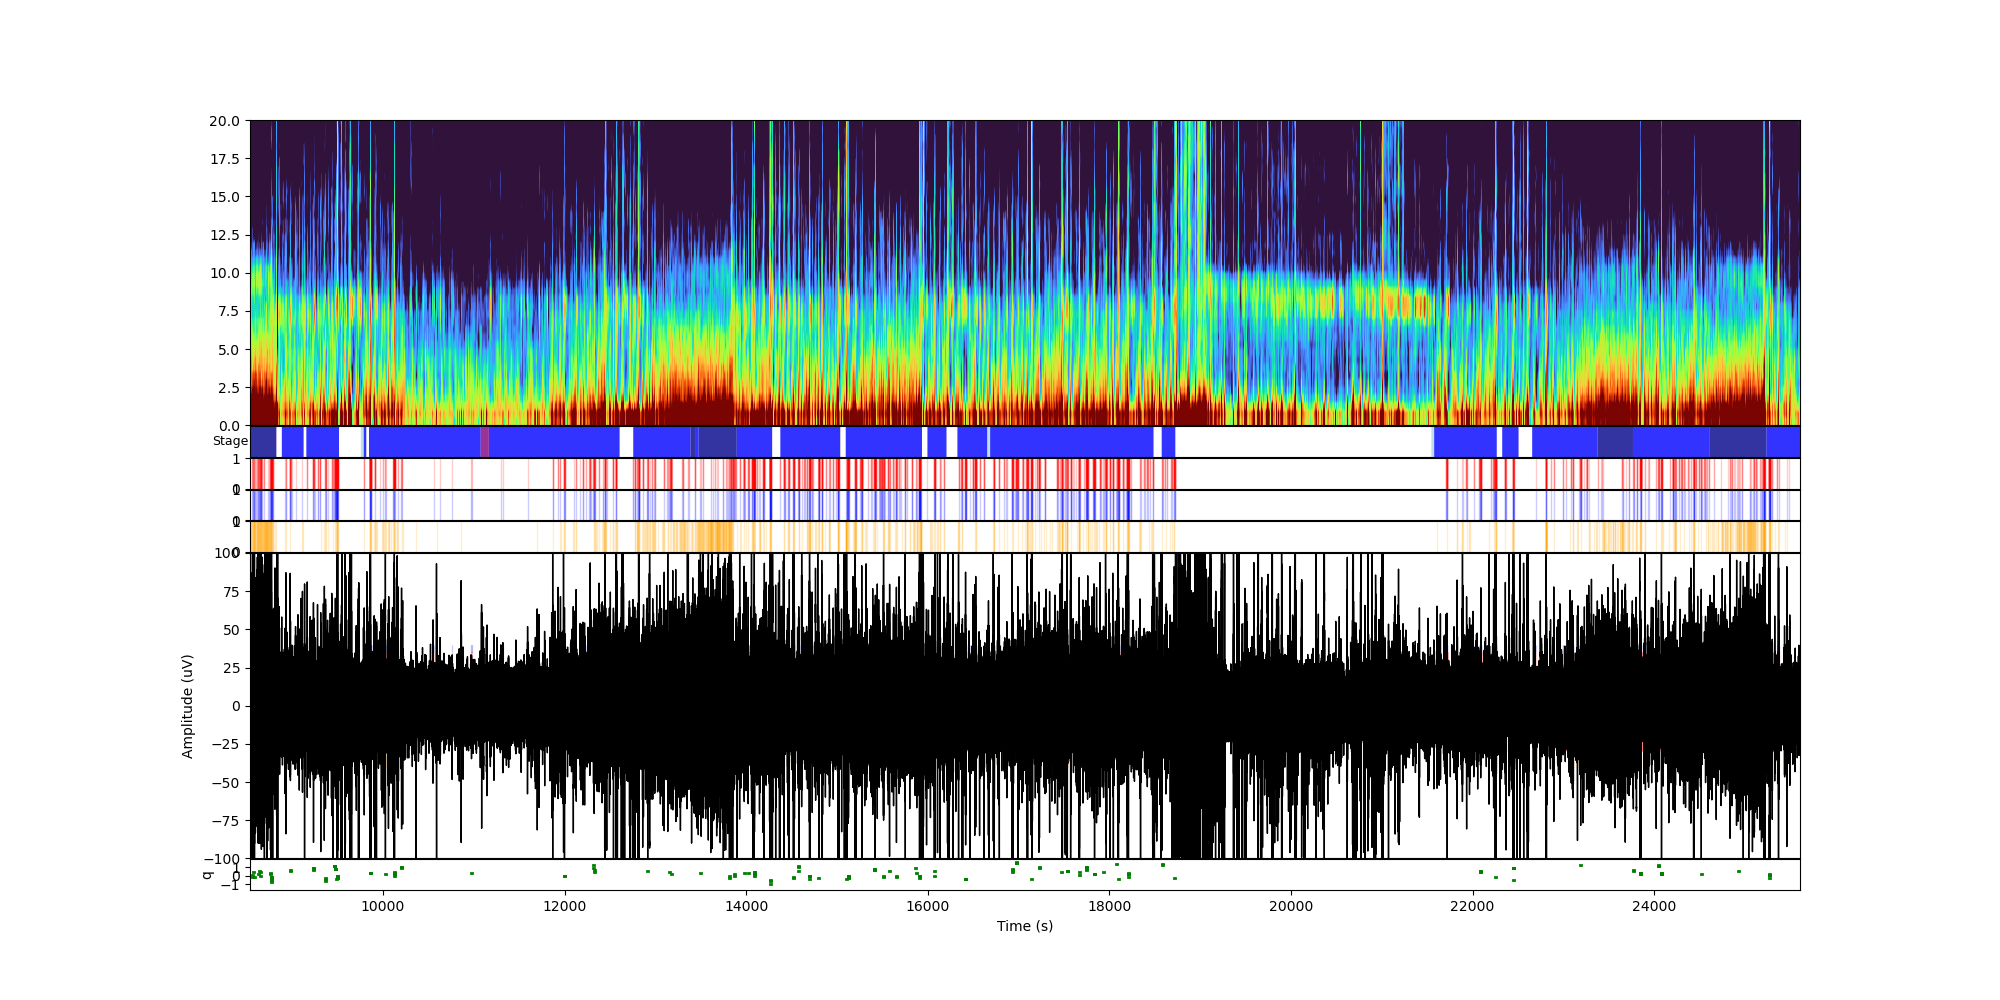

In [22]:
# df_spindle has a 'start' and 'stop' column for each spindle event. 

import matplotlib.pyplot as plt
import seaborn as sns

start_sec = data['time'].quantile(0.25)
end_sec = data['time'].quantile(0.75)
data_plot = data.loc[(data['time'] >= start_sec) & (data['time'] <= end_sec)]


df_spindle_plot = df_spindle.loc[(df_spindle['start'] >= start_sec) & (df_spindle['stop'] <= end_sec)]
df_mspindle_plot = df_mspindle.loc[(df_mspindle['msp_start'] >= start_sec) & (df_mspindle['msp_stop'] <= end_sec)]
df_so_plot = df_so.loc[(df_so['start'] >= start_sec) & (df_so['stop'] <= end_sec)]

height_ratios = [10, 1, 1, 1, 1, 10, 1]

fig, ax = plt.subplots(len(height_ratios), 1, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': height_ratios})

# _______________________________________________________________________________
# plot spectrogram:
i_axis = 0
im = ax[i_axis].imshow(specs.T, cmap='turbo', origin='lower', aspect='auto',
            extent=(0, specs.shape[0], 0, freq.max()),
            vmin=0, vmax=17)


# _______________________________________________________________________________
# Plot hypnogram:
i_axis += 1
palette_stage = ['darkblue', 'blue', 'lightblue', 'purple', 'gold']
annotations = data_plot['stage'].values.astype(float)
vals_hypno_tmp = np.zeros((len(annotations), 5))
vals_hypno_tmp[:] = np.nan
for i, val in enumerate(annotations):
    if val == 9:
        continue
    vals_hypno_tmp[i, int(val-1)] = 1
    
vals_hypno_tmp = pd.DataFrame(vals_hypno_tmp, columns=['N3', 'N2', 'N1', 'R', 'W'], index=data_plot['time'])

vals_hypno_tmp.plot(kind='area', color=palette_stage, alpha=.8, ax=ax[i_axis], sharex=True,
                stacked=True, lw=0, legend=True)

ax[i_axis].get_legend().remove()
ax[i_axis].set_ylim([0, 1])
ax[i_axis].set_yticks([])
ax[i_axis].set_ylabel('Stage', labelpad=1, fontsize=9, rotation=0, ha='right', va='center')


# _______________________________________________________________________________
# plot spindles:
i_axis += 1
for i, row in df_spindle_plot.iterrows():
    ax[i_axis].fill_between([row['start'], row['stop']], [0, 0], [1, 1], color='r', alpha=0.2)
ax[i_axis].set_ylim([0, 1])

# _______________________________________________________________________________
# plot mspindles ('msp_start' and 'msp_stop' columns):
i_axis += 1
for i, row in df_mspindle_plot.iterrows():
    ax[i_axis].fill_between([row['msp_start'], row['msp_stop']], [0, 0], [1, 1], color='b', alpha=0.2)
ax[i_axis].set_ylim([0, 1])

# _______________________________________________________________________________
# plot SOs:
i_axis += 1
for i, row in df_so_plot.iterrows():
    ax[i_axis].fill_between([row['start'], row['stop']], [0, 0], [1, 1], color='orange', alpha=0.2)
ax[i_axis].set_ylim([0, 1])


# _______________________________________________________________________________
# plot signals:
i_axis += 1
ax[i_axis].plot(data_plot['time'], data_plot['c4m1'], c='k', lw=1)
ax[i_axis].set_ylim([-100, 100])
ax[i_axis].set_ylabel('Amplitude (uV)')
ax[i_axis].set_xlim(data_plot['time'].min(), data_plot['time'].max())

# plot spindles:
for i, row in df_spindle_plot.iterrows():
    # ax.axvspan(row['start'], row['stop'], color='r', alpha=0.5)
    # now instead, plot a red line at y=100
    # ax.plot([row['start'], row['stop']], [100, 100], c='r', lw=2)
    # now do rectangles with y=-100 to y=100
    # ax.plot([row['start'], row['stop']], [-100, -100], c='r', lw=2)
    # ax.plot([row['start'], row['stop']], [100, 100], c='r', lw=2)
    # ax.plot([row['start'], row['start']], [-100, 100], c='r', lw=2)
    # ax.plot([row['stop'], row['stop']], [-100, 100], c='r', lw=2)
    # now do filled rectangles with alpha=0.2
    ax[i_axis].fill_between([row['start'], row['stop']], [-30, -30], [35, 35], color='r', alpha=0.2)

    ######################################
    # plot q values for start and stop:
    ax[i_axis + 1].plot([row['start']-0.05, row['stop']+0.05], [float(row['q']), float(row['q'])], c='g', lw=2)
    
ax[i_axis + 1].set_ylim(min(df_spindle_plot['q']), max(df_spindle_plot['q']))
ax[i_axis + 1].set_ylabel('q')

# plot mspindles ('msp_start' and 'msp_stop' columns):
for i, row in df_mspindle_plot.iterrows():
    ax[i_axis].fill_between([row['msp_start'], row['msp_stop']], [35, 35], [40, 40], color='b', alpha=0.2)
     
# plot SOs:
for i, row in df_so_plot.iterrows():
    ax[i_axis].fill_between([row['start'], row['stop']], [-40, -40], [-32, -32], color='orange', alpha=0.2)

print(row)

ax[-1].set_xlabel('Time (s)')
# ax[0].set_title('C4-M1 EEG signal')

plt.subplots_adjust(hspace=0.01)
plt.show()

In [ ]:
df_spindle.loc[df_spindle.start > 7410].sort_values('start')

,ch,f,spindle,amp,chirp,dur,fft,frq,frq1,frq2,...,peak_sp,q,start,start_sp,stop,stop_sp,symm,symm2,trough,trough_sp
ID,,,,,,,,,,,,,,,,,,,,,
study_001,C4M1,14.0,10.0,28.530305,0.000000,0.445,14.0625,12.359551,13.793103,13.793103,...,96533.0,0.828130,7412.435,96487.0,7412.880,96575.0,0.533708,0.067416,7412.657500,96531.0
study_001,C4M1,13.0,10.0,27.742312,-0.355619,0.465,14.0625,12.903226,13.513514,13.157895,...,96533.0,0.990287,7412.440,96488.0,7412.905,96580.0,0.500000,0.000000,7412.657337,96531.0
study_001,C4M1,15.0,11.0,24.540035,0.000000,0.400,14.0625,13.750000,14.285714,14.285714,...,96531.0,0.934174,7412.470,96494.0,7412.870,96573.0,0.418750,0.162500,7412.657342,96531.0
study_001,C4M1,12.0,9.0,22.200444,-1.138520,0.725,12.5000,12.413793,12.903226,11.764706,...,96532.0,0.046507,7412.520,96504.0,7413.245,96648.0,0.206897,0.586207,7412.650903,96530.0
study_001,C4M1,11.0,9.0,29.983891,0.187970,0.460,10.9375,9.782609,10.526316,10.714286,...,100479.0,0.102399,7432.125,100425.0,7432.585,100516.0,0.608696,0.217391,7432.382802,100476.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
study_001,C4M1,11.0,403.0,21.239793,-0.584795,0.470,10.9375,10.638298,11.111111,10.526316,...,3295956.0,-0.112736,31209.455,3295891.0,31209.925,3295984.0,0.686170,0.372340,31209.803710,3295960.0
study_001,C4M1,15.0,202.0,25.646042,0.416667,0.540,14.0625,13.888889,14.583333,15.000000,...,3316593.0,1.167852,31312.640,3316528.0,31313.180,3316635.0,0.587963,0.175926,31312.978131,3316595.0
study_001,C4M1,16.0,156.0,21.582741,0.801282,0.530,15.6250,14.150943,14.583333,15.384615,...,3316591.0,1.151650,31312.645,3316529.0,31313.175,3316634.0,0.589623,0.179245,31312.978143,3316595.0
